In [1]:
import matplotlib.pyplot as plt
import numpy as np

path = './data/runs/run@/1200-test-log.csv' # replace @ with run number

In [2]:
def load_log(p):
    values = []
    with open(p, 'r') as f:
        for l in f.readlines():
            values.append([float(i) for i in l.replace('\n', '').split(',')])

    return values

In [3]:
runs_data = []
runs_data_uncapped = []

# for now we'll cap at 100 epochs since I did more than 100 on some.
for i in range(5):
    runs_data.append(np.array(load_log(path.replace('@', str(i+1))))[:100])
    runs_data_uncapped.append(np.array(load_log(path.replace('@', str(i+1)))))

run_labels = ['base', '500 hidden', '500 hidden, 2000 synapse', '50 mutations', '500 hidden 4000 synapse']

Text(0.5, 1.0, 'Training accuracy')

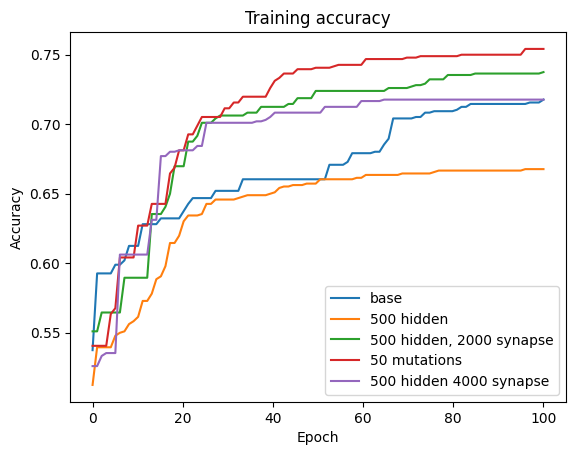

In [4]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(5):
    plt.plot(np.linspace(0, len(runs_data[i]), len(runs_data[i])), runs_data[i][:, 0], label=run_labels[i])
plt.legend()
plt.title('Training accuracy')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Validation set accuracy')

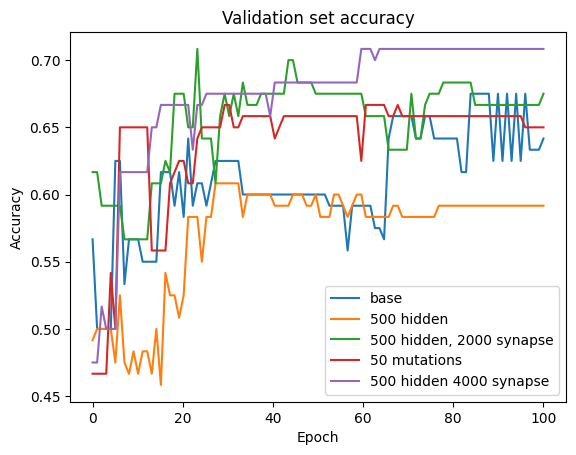

In [5]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(5):
    plt.plot(np.linspace(0, len(runs_data[i]), len(runs_data[i])), runs_data[i][:, 1], label=run_labels[i])
plt.legend()
plt.title('Validation set accuracy')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Average pop accuracy')

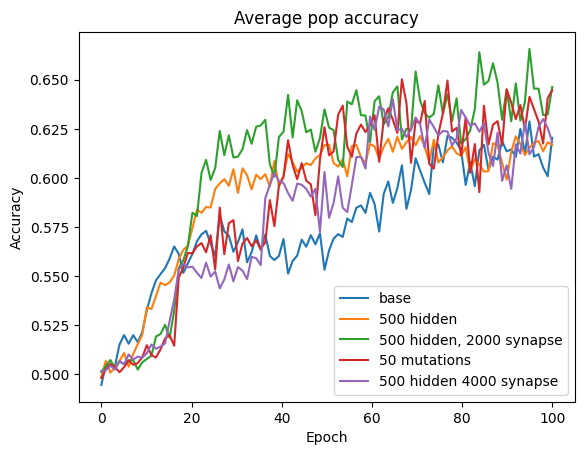

In [6]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(5):
    plt.plot(np.linspace(0, len(runs_data[i]), len(runs_data[i])), runs_data[i][:, 2], label=run_labels[i])
plt.legend()
plt.title('Average pop accuracy')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Training accuracy (200 epochs, from run 4 beyond)')

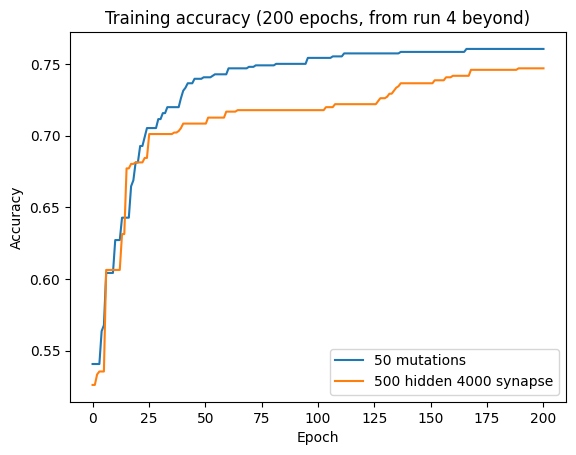

In [7]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(3,5):
    plt.plot(np.linspace(0, len(runs_data_uncapped[i]), len(runs_data_uncapped[i])), runs_data_uncapped[i][:, 0], label=run_labels[i])
plt.legend()
plt.title('Training accuracy (200 epochs, from run 4 beyond)')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Validation accuracy (200 epochs, from run 4 beyond)')

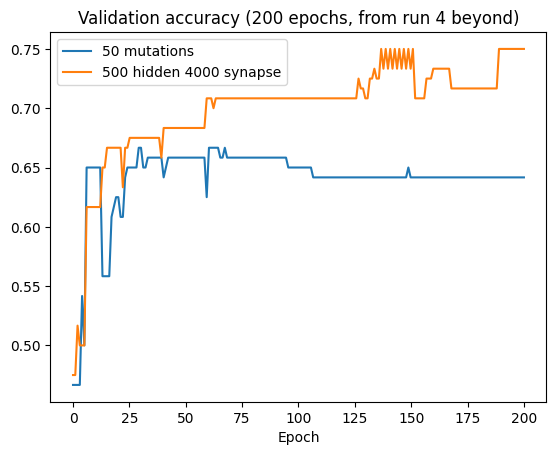

In [8]:
### plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(3,5):
    plt.plot(np.linspace(0, len(runs_data_uncapped[i]), len(runs_data_uncapped[i])), runs_data_uncapped[i][:, 1], label=run_labels[i])
plt.legend()
plt.title('Validation accuracy (200 epochs, from run 4 beyond)')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20